In [39]:
import pandas as pd

# reload from raw data if you want to start fresh
df = pd.read_csv('../data/raw/WA_Fn-UseC_-Telco-Customer-Churn.csv')

# convert TotalCharges to numeric again
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(0)

# check
print(df.head())
print(df.info())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [40]:
df = df.drop(columns=['customerID'])

In [41]:
print(df.dtypes)

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object


In [42]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# columns to label-encode
cat_cols = [
    'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 
    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
    'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 
    'PaperlessBilling', 'PaymentMethod', 'Churn'
]

# apply encoding
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

# check result
df.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [43]:
print(df.dtypes)

gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object


In [44]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Churn'])
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")

Training samples: 5634
Testing samples: 1409


In [45]:
# check class proportions in the training set
print("Train churn proportion:")
print(y_train.value_counts(normalize=True))

# check class proportions in the test set
print("\nTest churn proportion:")
print(y_test.value_counts(normalize=True))


Train churn proportion:
Churn
0    0.734647
1    0.265353
Name: proportion, dtype: float64

Test churn proportion:
Churn
0    0.734564
1    0.265436
Name: proportion, dtype: float64


Let’s dive into modeling! Welcome to 03_modeling.ipynb.

Here’s how we’ll structure it, nice and clean:

Step 1: Logistic Regression Baseline

In [46]:
from sklearn.preprocessing import StandardScaler

# create scaler
scaler = StandardScaler()

# fit on train, transform both train and test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# create logistic regression model
logreg = LogisticRegression(max_iter=1000)

# fit on training data
logreg.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [48]:
# predictions
y_pred = logreg.predict(X_test_scaled)
y_proba = logreg.predict_proba(X_test_scaled)[:, 1]

In [49]:
# confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[920 115]
 [169 205]]


In [50]:
# classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1035
           1       0.64      0.55      0.59       374

    accuracy                           0.80      1409
   macro avg       0.74      0.72      0.73      1409
weighted avg       0.79      0.80      0.79      1409



In [51]:
# ROC AUC
auc = roc_auc_score(y_test, y_proba)
print(f"\nROC AUC: {auc:.3f}")


ROC AUC: 0.840


Random Forest Modeling Steps
✅ 1. Train the random forest
✅ 2. Evaluate it (accuracy, precision, recall, F1, ROC AUC)
✅ 3. Look at feature importances
✅ 4. Compare it to logistic regression

In [52]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators = 100,
    random_state = 42,
    class_weight = 'balanced'
)

rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [53]:
# predict
y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:, 1]

In [ ]:
# confusion matrix
print("Confusion Matrix (RF):")
print(confusion_matrix(y_test, y_pred_rf))

# classification report
print("\nClassification Report (RF):")
print(classification_report(y_test, y_pred_rf))

# ROC AUC
auc_rf = roc_auc_score(y_test, y_proba_rf)
print(f"\nROC AUC (RF): {auc_rf:.3f}")

Confusion Matrix (RF):
[[932 103]
 [200 174]]

Classification Report (RF):
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1035
           1       0.63      0.47      0.53       374

    accuracy                           0.78      1409
   macro avg       0.73      0.68      0.70      1409
weighted avg       0.77      0.78      0.77      1409


ROC AUC (RF): 0.822


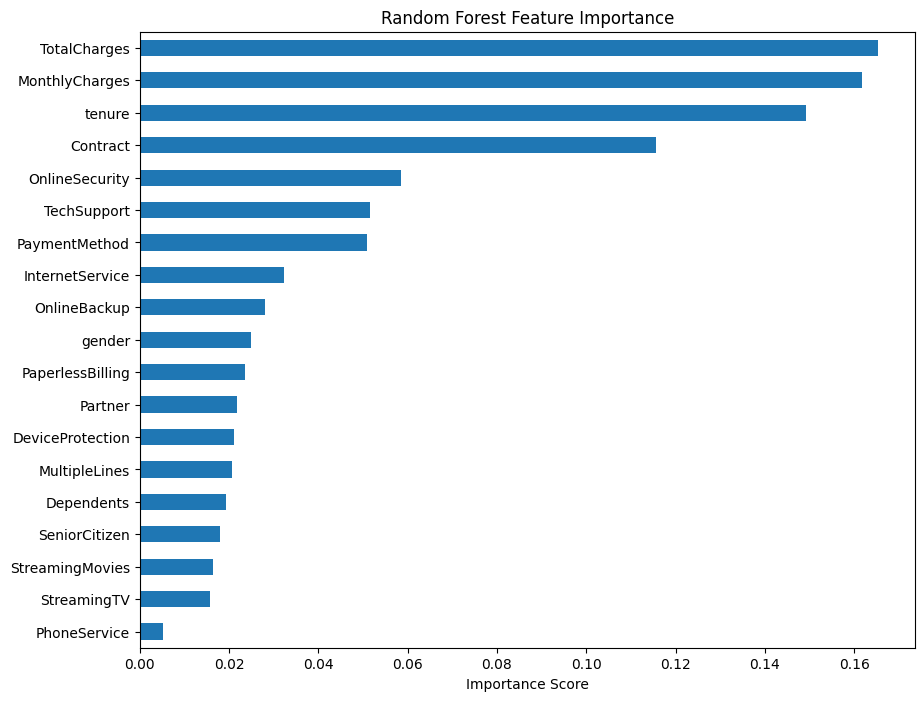

In [55]:
import matplotlib.pyplot as plt
# get feature importances
importances = pd.Series(rf.feature_importances_, index=X_train.columns)

# sort and display
importances.sort_values(ascending=True).plot(kind="barh", figsize=(10,8))
plt.title("Random Forest Feature Importance")
plt.xlabel("Importance Score")
plt.show()

In [56]:
from sklearn.model_selection import RandomizedSearchCV

# define hyperparameter space
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# random search
rf_random = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid,
    n_iter=20,
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# fit
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(class_weight='balanced',
                                                    random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'max_depth': [None, 5, 10, 20],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   random_state=42, verbose=2)

In [59]:
print("Best parameters found:")
print(rf_random.best_params_)

best_rf = rf_random.best_estimator_

# evaluate
y_pred_best = best_rf.predict(X_test)
y_proba_best = best_rf.predict_proba(X_test)[:,1]

print("\nClassification Report (Tuned RF):")
print(classification_report(y_test, y_pred_best))

print("\nROC AUC (Tuned RF):")
print(roc_auc_score(y_test, y_proba_best))


Best parameters found:
{'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None}

Classification Report (Tuned RF):
              precision    recall  f1-score   support

           0       0.86      0.85      0.85      1035
           1       0.60      0.61      0.60       374

    accuracy                           0.79      1409
   macro avg       0.73      0.73      0.73      1409
weighted avg       0.79      0.79      0.79      1409


ROC AUC (Tuned RF):
0.829246428479165


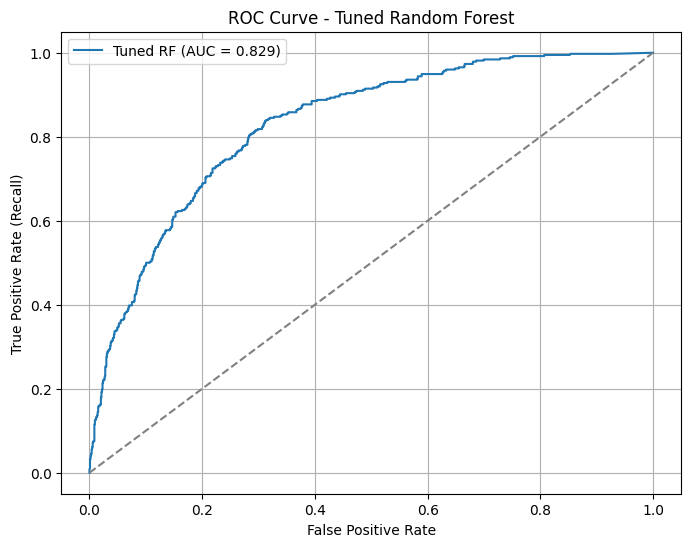

In [60]:
from sklearn.metrics import roc_curve, auc

# get fpr, tpr
fpr, tpr, thresholds = roc_curve(y_test, y_proba_best)
roc_auc = auc(fpr, tpr)

# plot
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"Tuned RF (AUC = {roc_auc:.3f})")
plt.plot([0,1], [0,1], linestyle="--", color="gray")  # random guess line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve - Tuned Random Forest")
plt.legend()
plt.grid()
plt.show()


SAVE THE MODEL

In [61]:
import joblib

# save the tuned random forest
joblib.dump(best_rf, "tuned_random_forest_model.joblib")

['tuned_random_forest_model.joblib']

In [62]:
# assuming you have your original dataframe still as `df`
# and you have X prepared as features
# (the same X you trained on, with encoded columns)

# get probabilities for ALL customers
df["churn_probability"] = best_rf.predict_proba(X)[:, 1]
df["churn_prediction"] = best_rf.predict(X)

# save
df.to_csv("churn_predictions.csv", index=False)
